<a href="https://colab.research.google.com/github/dsakharuk/Deliverables/blob/master/Converting_stroke_data_to_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import IPython.display
import PIL.Image
import random
from skimage.transform import resize
import math
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from PIL import ImageOps
import itertools
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from sklearn.metrics import confusion_matrix
%load_ext tensorboard
import datetime, os
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
#!pip install tensorflow==2.0.0

#print(tf.__version__)
# I read in my training data set here
path = "/content/drive/My Drive/Data/train-data.csv"
df = pd.read_csv(path, sep= ";", header = 0,quotechar="'")
path2 = "/content/drive/My Drive/Data/test-data.csv"
df_test = pd.read_csv(path2, sep= ";", header = 0,quotechar="'")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Checks the tensorflow version

print(tf.__version__)

2.0.0


In [0]:
#This will create a new array with the shrunk down image sizes 
#For training
raw_strokes = df['data']
smaller_images = []
for image in raw_strokes:
  image_ar = []
  indiv_stroke = eval(image)
  for stroke_2 in indiv_stroke:
    for point in stroke_2:
      x = math.floor(point['x'] / 4)
      y = math.floor(point['y'] / 4)
      image_ar.append((x,y))
  smaller_images.append(image_ar)
smaller_images.pop()
new_images = np.array(smaller_images)


In [0]:
#Trying to crop one image
original = PIL.Image.fromarray(draw_it(new_images[2]))
original = PIL.ImageOps.expand(original,border=2, fill=1)
IPython.display.display(original)
cropp = original.crop((5,0,200,200))
cropp = PIL.ImageOps.expand(cropp,border=2)
IPython.display.display(cropp)


In [0]:
#I am going to crop the images here

cropped_images = []

for imm in new_images:

  max_x = 0
  max_y = 0
  min_x = 10000
  min_y = 10000
  original = PIL.Image.fromarray(draw_it(imm))
  for x in imm:
    max_x = max(max_x,x[0])
    max_y = max(max_y,x[1])
    min_x = min(min_x,x[0])
    min_y = min(min_y,x[1])

  left = min_x -2
  right = left + 90
  top = min_y -2
  bottom = top + 90
  original = PIL.ImageOps.expand(original,border=25,fill=255)
  cropped = original.crop((left,top,right,bottom))
  cropped_images.append(cropped)


In [0]:
#Prints out all the cropped images
for x in enumerate(cropped_images):
  cropp = PIL.ImageOps.expand(x[1],border=2,fill=1)
  print(cropp.size)
  IPython.display.display(cropp)
  print(x[0])



In [0]:
#Visualizing any image
plt.figure()
plt.imshow(cropped_images[80009])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#I will remove all the completely black images from the data set and their key in the Y_train list
for a in enumerate(cropped_images):
  if a[1].getbbox() == None:
    del cropped_images[a[0]]
    del y_train_not_shuffled[a[0]]


In [0]:
#I will convert the list of PIL images into a np array 
#new_cropped = []
#for x in shuffled_images:
  #new_cropped.append(np.array(x))
#new_cropped = np.asarray(new_cropped)
print(new_cropped.shape)
print(type(new_cropped[3]))
print(len(y_train))
#new_cropped = np.expand_dims(new_cropped,axis=3)


(150929, 90, 90, 1)
<class 'numpy.ndarray'>
150929


In [0]:
print(len(cropped_images))
print(len(y_train_not_shuffled))

150929
150929


In [0]:
#Creating the y array of image classes

#Train Symbols
y_train_not_shuffled = df['symbol_id'].tolist()
print(len(y_train_not_shuffled))
y_train_not_shuffled.pop(151158)

#Test Symbols
y_test_not_shuffled = df_test['symbol_id'].tolist()




151159


In [0]:
#This shuffles the training/testing images images so that it is possible to break down data into batches.
#shuffled_images, y_train = shuffle(cropped_images, y_train_not_shuffled)
shuffled_test, y_test = shuffle(cropped_test, y_test_not_shuffled)


In [0]:
#This is my conversion function. It takes the stroke data of each image and draws out the image by connecting the dots.

def draw_it(points):
    image = Image.new("L", (264,264), color=255)
    image_draw = ImageDraw.Draw(image)

    for i in range(len(points)-1 ):
      image_draw.line([points[i][0], 
                        points[i][1],
                        points[i+1][0], 
                        points[i+1][1]],
                      fill=0, width=2)
    return np.array(image) 

In [0]:
#shuffled_images = np.array(shuffled_images)
print(type(new_cropped[30]))
print(np.shape(new_cropped[30]))
print(new_cropped[60])

In [0]:
#This will create array of images for Training
def convert(batch):
  temp = []
  for x in batch:
    temp.append(draw_it(x))
  return temp


In [0]:
#Train Images
#This will save the new small image array into a numpy file and save it to drive

np.save('new_converted_train_images',new_cropped)
!cp new_converted_train_images.npy "drive/My Drive/Data/"


In [0]:
#Training
#This is saving the label datasets
np.savetxt('new_y_train.csv',y_train,fmt='%s',delimiter=',')
!cp new_y_train.csv "drive/My Drive/Data/"


In [0]:
#This checks the shape of all the training data
print(new_cropped.shape)

(150929, 90, 90, 1)


In [0]:
#Test Images
#This will create a new array with the shrunk down image sizes for testing 
raw_strokes = df_test['data']
smallr_images = []
for image in raw_strokes:
  image_ar = []
  indiv_stroke = eval(image)
  for stroke_2 in indiv_stroke:
    for point in stroke_2:
      x = math.floor(point['x'] / 4)
      y = math.floor(point['y'] / 4)
      image_ar.append((x,y))
  smallr_images.append(image_ar)
test_images = np.array(smallr_images)


In [0]:
#This will crop all the test images
cropped_test = []

for imm in test_images:
  max_x = 0
  max_y = 0
  min_x = 10000
  min_y = 10000
  originall = PIL.Image.fromarray(draw_it(imm))
  for x in imm:
    max_x = max(max_x,x[0])
    max_y = max(max_y,x[1])
    min_x = min(min_x,x[0])
    min_y = min(min_y,x[1])

  left = min_x -2
  right = left + 90
  top = min_y -2
  bottom = top + 90
  originall = PIL.ImageOps.expand(originall,border=25,fill=255)
  croppd = originall.crop((left,top,right,bottom))
  cropped_test.append(croppd)
  

In [0]:
#This will remove all black images in test dataset
for a in enumerate(cropped_test):
  if a[1].getbbox() == None:
    del cropped_test[a[0]]
    del y_test_not_shuffled[a[0]]

In [0]:
print(len(cropped_test))
print(len(y_test_not_shuffled))

17052
17052


In [0]:
#This will convert shuffled small test images into correct numpy array
#new_cropped_test = []
#for x in shuffled_test:
  #new_cropped_test.append(np.array(x))
#new_cropped_test = np.asarray(new_cropped_test)
print(new_cropped_test.shape)
print(type(new_cropped_test[3]))
print(len(y_test))
#new_cropped_test = np.expand_dims(new_cropped_test,axis=3)

(17052, 90, 90, 1)
<class 'numpy.ndarray'>
17052


In [0]:
#Test Images
#This will save the new small image array into a csv file and then save it to drive TESTING
np.save('new_converted_test_images',new_cropped_test)
!cp new_converted_test_images.npy "drive/My Drive/Data/"


In [0]:
#This saves the test labels as csv
np.savetxt('new_y_test.csv',y_test,fmt='%s',delimiter=',')
!cp new_y_test.csv "drive/My Drive/Data/"

In [0]:
#________________________________________________________________________________________________________________________________________________________________________________
#____________________________________________________________________________________________________________________________________________________________________
#This will start my Pipeline
#I will build a simple sequential Keras model first
#This is where I upload all my data
path = "/content/drive/My Drive/Data/new_y_train.csv"
dftrain = pd.read_csv(path, sep= ";", header = None,quotechar="'")
dftrain = np.asarray(dftrain)

path2 = "/content/drive/My Drive/Data/new_y_test.csv"
dftest = pd.read_csv(path2, sep= ";", header = None,quotechar="'")
dftest = np.asarray(dftest)

path3 = "/content/drive/My Drive/Data/new_converted_train_images.npy"
train_images = np.load(path3)
path4 = "/content/drive/My Drive/Data/new_converted_test_images.npy"
test_images = np.load(path4)
path5 = "/content/drive/My Drive/Data/symbols.csv"
dfsymbols = pd.read_csv(path5, sep= ";", header = None,quotechar="'")
dflabels = dfsymbols.iloc[1:,1]
dflabels = np.asarray(dflabels)
dfsymbols = dfsymbols.iloc[1:,0]
dfsymbols = np.asarray(dfsymbols)

In [0]:
#Checking the shape of all my data
print(train_images.shape)
print(test_images.shape)

(150929, 90, 90, 1)
(17052, 90, 90, 1)


In [0]:
#Preprocessing images
train_images = train_images/255.0
test_images = test_images/255.0


In [0]:
#Creating dictionary
print(dfsymbols[0])
print(len(dfsymbols))
Dict = {}
for x,y in enumerate(dfsymbols):
  Dict.update({y:x})

31
369


In [0]:
#creating mapping dictionary
alphabet = {}
for c in range(369):
  alphabet.update({c:dflabels[c]})

In [0]:
#saving mapping dictionary
np.save("/content/drive/My Drive/Data/mapping_dictionary.npy",alphabet)

In [0]:
#Adjusting training labels
temp = []
for x in range(len(dftrain)):
  number = dftrain[x][0]
  #print(number)
  b = Dict[str(number)]
  #print(a)
  temp.append(b)

In [0]:
#Saving new training symbols
np.savetxt('new_y_train.csv',temp,fmt='%s',delimiter=',')
!cp new_y_train.csv "drive/My Drive/Data/"

In [0]:
#Doing the same thing for the test symbols
tempo = []
for x in range(len(dftest)):
  numberr = dftest[x][0]
  #print(number)
  c = Dict[str(numberr)]
  #print(a)
  tempo.append(c)

In [0]:
#Saving new test symbols
np.savetxt('new_y_test.csv',tempo,fmt='%s',delimiter=',')
!cp new_y_test.csv "drive/My Drive/Data/"

In [0]:
#Building sequential model
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3), padding='same', activation='relu',input_shape=[90,90,1] ))
model.add(Conv2D(filters=64,kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(.35))
model.add(Flatten())
model.add(Dense(units=128, activation='relu',))
#model.add(Dropout(.2))
model.add(Dense(units=369, activation='softmax'))
adam = optimizers.Adam(learning_rate=.008)

In [4]:
#Adding layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 90, 90, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 45, 45, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               16588928  
_________________________________________________________________
dense_1 (Dense)              (None, 369)               4

In [0]:
#Compiling model
model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])


In [0]:
#Using callbacks to save and restart training
filepath = "/content/drive/My Drive/Data/bestweight.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_sparse_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
#Training Model
history=model.fit(train_images,dftrain, batch_size=20,epochs=10, verbose=1, validation_data=(test_images,dftest),callbacks=callbacks_list)

Train on 150929 samples, validate on 17052 samples
Epoch 1/10
150920/150929 [============================>.] - ETA: 0s - loss: 2.1265 - sparse_categorical_accuracy: 0.4878
Epoch 00001: val_sparse_categorical_accuracy did not improve from 0.67183
150929/150929 [==============================] - 3377s 22ms/sample - loss: 2.1263 - sparse_categorical_accuracy: 0.4878 - val_loss: 1.5787 - val_sparse_categorical_accuracy: 0.5886
Epoch 2/10
 22000/150929 [===>..........................] - ETA: 46:51 - loss: 1.9704 - sparse_categorical_accuracy: 0.5125

In [0]:
#model.save("/content/drive/My Drive/Data/model_weights_69",save_format='tf',)
#Saving model to local machine
model.save("67_acc_keras_model",save_format='h5')

In [0]:
#Plotting my models validation vs training accuracy
logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}

In [0]:
#Loading model for further training
model.load_weights('/content/drive/My Drive/Data/bestweight.hdf5')

In [0]:
#Loading saved model
#loaded_model = tf.keras.models.load_model('/content/drive/My Drive/Data/model_weights_67')
loaded_model = tf.keras.models.load_model('67_acc_keras_model')

In [5]:
#Checking Loaded model
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 90, 90, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 45, 45, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               16588928  
_________________________________________________________________
dense_1 (Dense)              (None, 369)               4

In [0]:
#Predicting with the model
#img = np.expand_dims(test_images[0],axis=0)
predictions = loaded_model.predict_classes(test_images,batch_size=50,verbose=1)
len(predictions)
max(predictions)

17052/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

368

In [0]:
#Reshaping image
test_loss, test_acc = loaded_model.evaluate(test_images,  dftest, verbose=2)
#len(predictions)

17052/1 - 93s - loss: 1.2719 - sparse_categorical_accuracy: 0.6959


In [0]:
#Visualizing images
image = np.reshape(test_images[10376],(90,90))
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#Images and predictions
for x in range(2000,2060):
    #image = mpimg.imread(filename)
    #<something gets done here>
    im =test_images[x]
    im = np.reshape(im,(90,90))
    plt.figure()
    plt.imshow(im)
    label = alphabet[predictions[x]]
    plt.xlabel(label)
    print(alphabet[dftest[x][0]])
    print(predictions[x])
    print(dftest[x][0])

In [0]:
test_images[3].shape

(90, 90, 1)

In [0]:
#Generating confusion matrix
print('Confusion matrix')
#confusion_matrix(dftest,predictions)
plt.matshow(confusion_matrix(dftest,predictions))







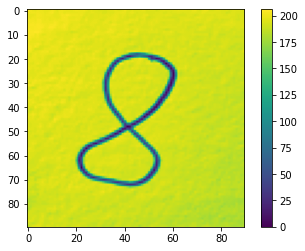

In [6]:
#Checking the model on my own drawing
image = PIL.Image.open('/content/8.jpg') 
image = image.convert(mode = "L")
image = image.resize((90,90))
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()


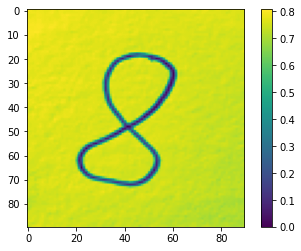

In [7]:
image = np.array(image)
image =image/255
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
#Predicting based on my drawing
#image = np.array(image)
image = np.expand_dims(image,axis=2)
image = np.expand_dims(image,axis=0)
image = image.astype('float16',copy=False)
predictions = loaded_model.predict_classes(image,batch_size=50,verbose=1)

ValueError: ignored

In [11]:
print(predictions)
print(alphabet[predictions[0]])

[309]
\mathcal{L}
